# Loan Application Status Prediction Project:

Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

Downlaod Files:                                                
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [294]:
#importing libraries
import pandas as pd
import numpy as np

In [295]:
#import the data by pandas
df=pd.read_csv("loan_prediction.csv")

In [296]:
#Calling the dataframe to view
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [297]:
#checking null values in our dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

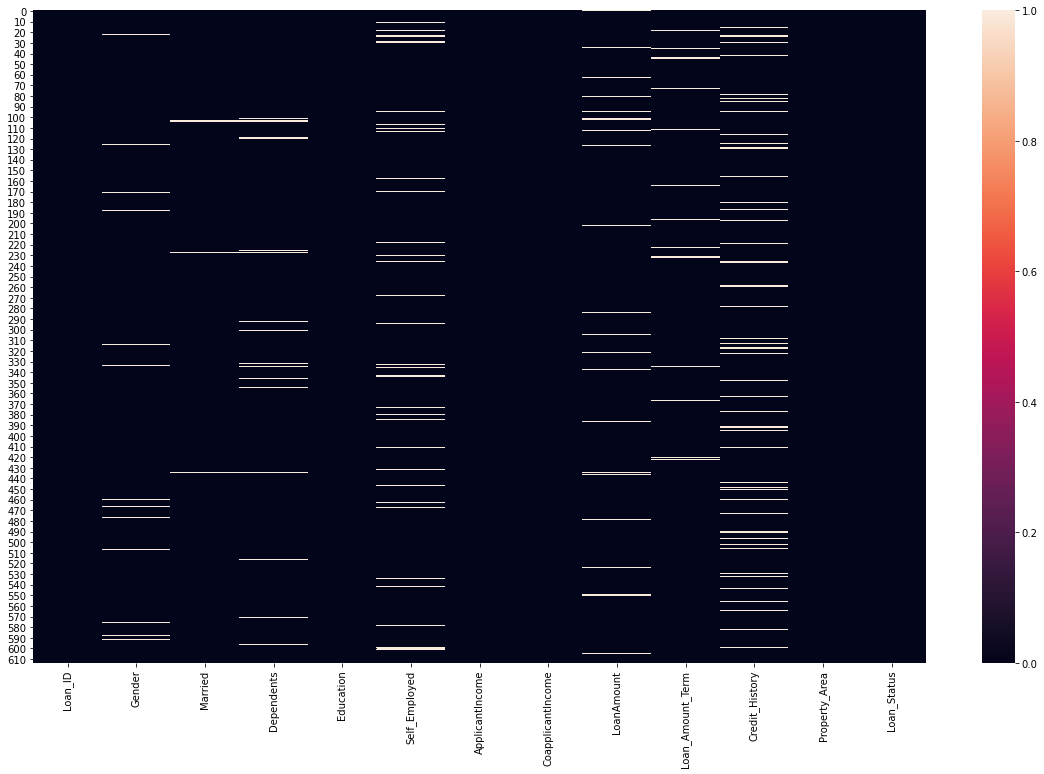

In [298]:
#Checking Null Values using HeatMap
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull())

we see that there are lot of null values in our dataframe.In order to create a good model we need to work properly on null values

In [299]:
#checking information of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


object type column:                                                                                                             
    1.Loan_ID                      
    2.Gender                                            
    3.Married
    4.Dependents                   
    5.Education                                     
    6.Self_Employed                         
    7.Property_area                     
    8.Loan_status                                    

    
float type column:                              
    1.CoapplicantIncome                               
    2.LoanAmount                              
    3.Loan_Amount_Term                       
    4.Property_area                                  
    
    
Int type column:                      
    1.ApplicantIncome                                                   

Filling The Missing Values:

In [167]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")

In [168]:
#Filling the Missing Value Of Married Column
df["Married"]=imp.fit_transform(df["Married"].values.reshape(-1,1))

In [169]:
#Filling the Missing Value Of Gender Column
df["Gender"]=imp.fit_transform(df["Gender"].values.reshape(-1,1))

In [170]:
#Filling the Missing Value Of Dependents Column
df["Dependents"]=imp.fit_transform(df["Dependents"].values.reshape(-1,1))

In [171]:
#Filling the Missing Value Of Self_Employed Column
df["Self_Employed"]=imp.fit_transform(df["Self_Employed"].values.reshape(-1,1))

In [172]:
imp_f=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [173]:
#Filling the Missing Value Of LoanAmount Column
df["LoanAmount"]=imp_f.fit_transform(df["LoanAmount"].values.reshape(-1,1))

In [174]:
#Filling the Missing Value Of LoanAmount Column
df["LoanAmount"]=imp_f.fit_transform(df["LoanAmount"].values.reshape(-1,1))

In [175]:
#Filling the Missing Value Of Loan_Amount_Term Column
df["Loan_Amount_Term"]=imp.fit_transform(df["Loan_Amount_Term"].values.reshape(-1,1))

In [176]:
#Filling the Missing Value Of Credit_History Column
df["Credit_History"]=imp.fit_transform(df["Credit_History"].values.reshape(-1,1))

In [177]:
#checking Null Values in the DataFrame
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

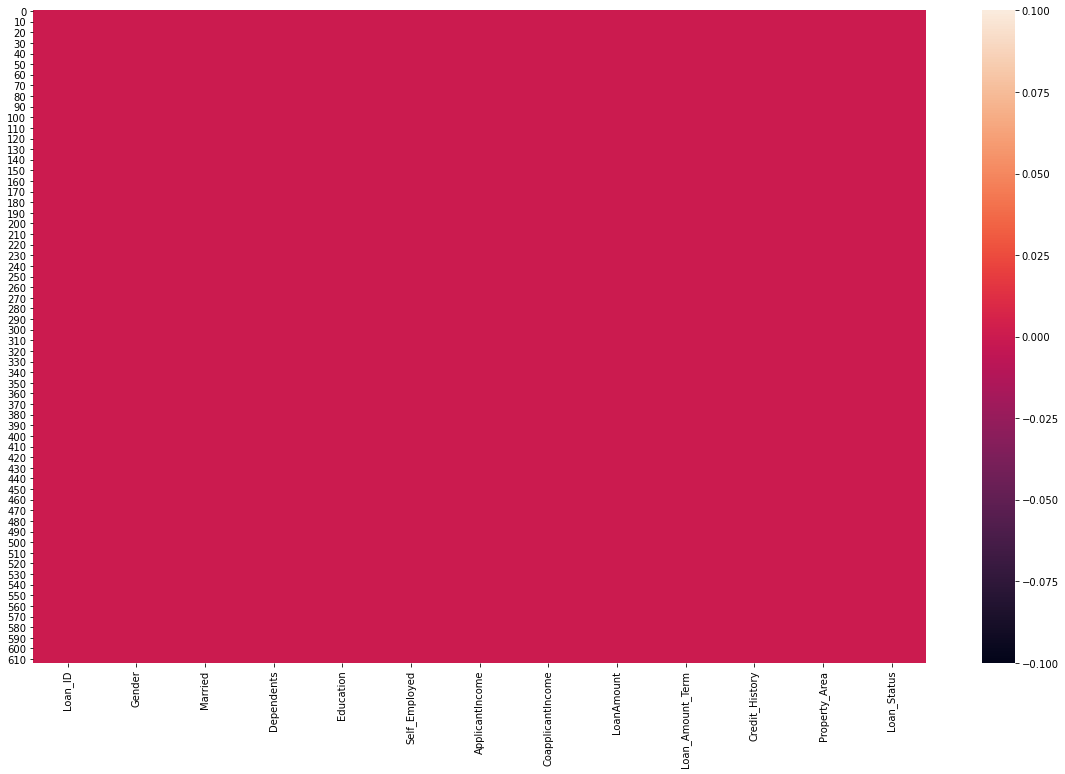

In [178]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull())

we see that there is no missing values in our DataFrame

In [300]:
#checking Shape of our Dataframe
df.shape

(614, 13)

we see that there are 614 rows and 13 volumns in our DataFrame.This means we have 614 customer data and 12 types of data to determine whether a new customer is eligible for a loan or not.

In [301]:
#Checkig columns name
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [302]:
#import visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

We see that the "Loan_ID" columns in our dataframes identify of each loan applicant customer..se we drop this column from our DataFrame.

In [303]:
#droping "Loan_ID"
df=df.drop("Loan_ID",axis=1)

In [304]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [305]:
df.shape

(614, 12)

In [306]:
df.dtypes.index

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [311]:
# checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
[0, 1, 2, 3, 4, 10, 11]


In [312]:
len(categorical_columns)

7

In [313]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
[5, 6, 7, 8, 9]


In [314]:
len(numerical_columns)

5

In [315]:
len(df.dtypes.index)==len(numerical_columns)+len(categorical_columns)

True

# Univariate Analysis:

column Name: Gender


Male      489
Female    112
Name: Gender, dtype: int64


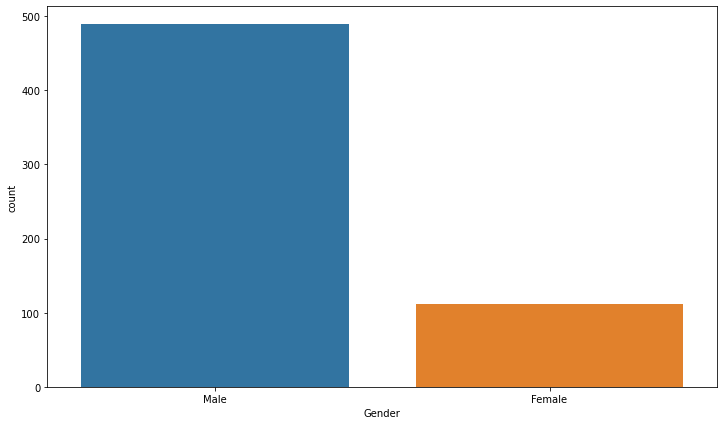



####################################################################################################


In [309]:
i=0
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

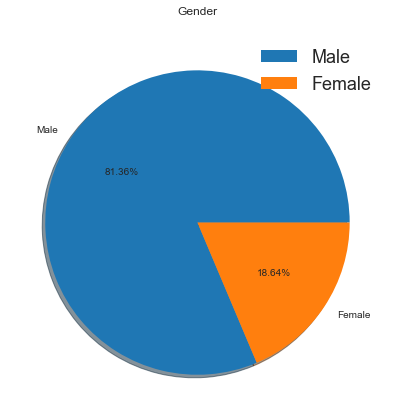

In [345]:
plt.figure(figsize=(12,7))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender\n')
plt.legend(prop={'size':18})
plt.show()

we see from the above graph that the number of loan applicant male customer is greater than loan applicant female customer.

column Name: Married


Yes    398
No     213
Name: Married, dtype: int64


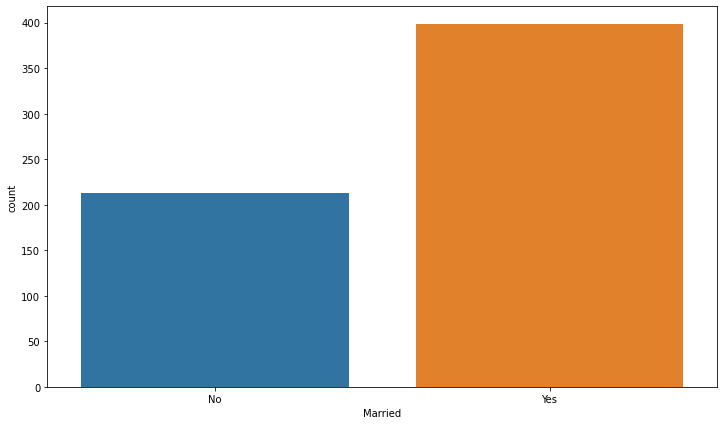



####################################################################################################


In [316]:
i=1
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we see from the above graph that most of the loan applicant customer is married

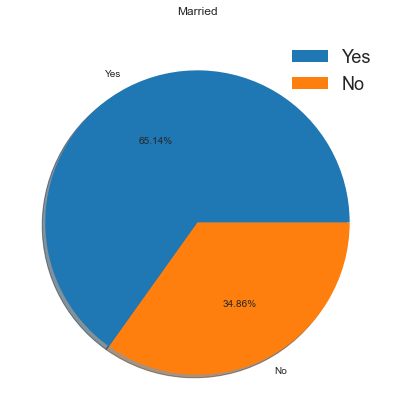

In [346]:
plt.figure(figsize=(12,7))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Married\n')
plt.legend(prop={'size':18})
plt.show()

column Name: Dependents


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


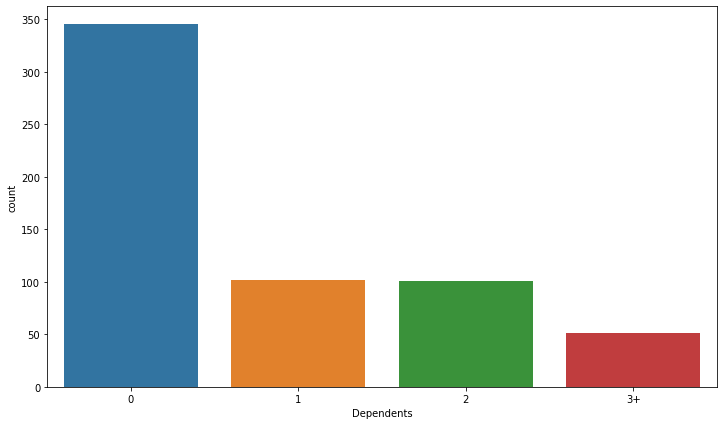



####################################################################################################


In [317]:
i=2
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

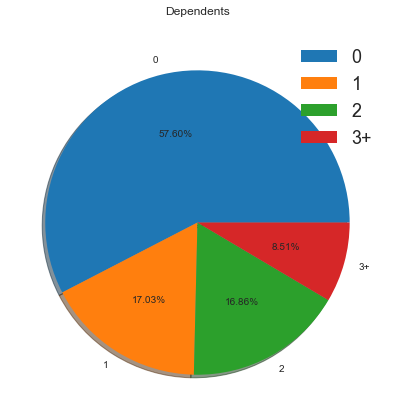

In [347]:
plt.figure(figsize=(12,7))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Dependents\n')
plt.legend(prop={'size':18})
plt.show()

Most of the applicant is independent

column Name: Education


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


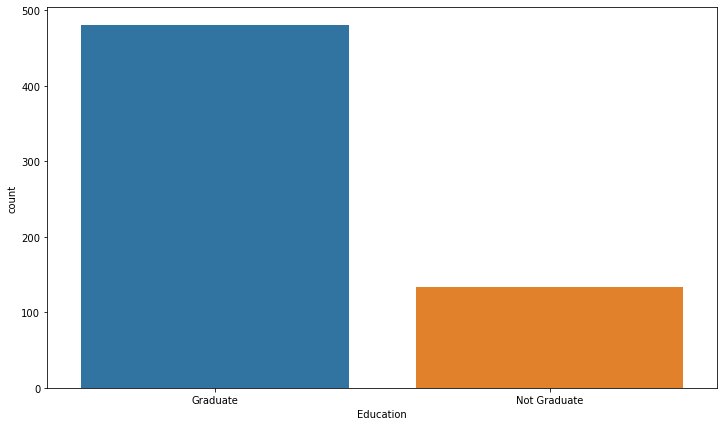



####################################################################################################


In [318]:
i=3
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

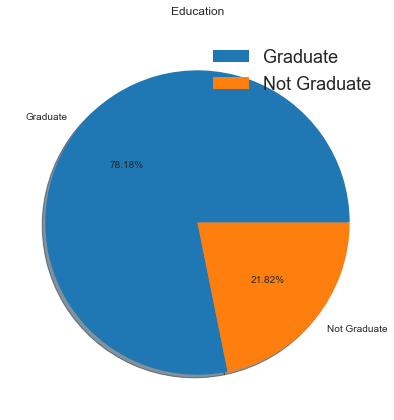

In [348]:
plt.figure(figsize=(12,7))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education\n')
plt.legend(prop={'size':18})
plt.show()

Most of the applicant are Graduate

column Name: Self_Employed


No     500
Yes     82
Name: Self_Employed, dtype: int64


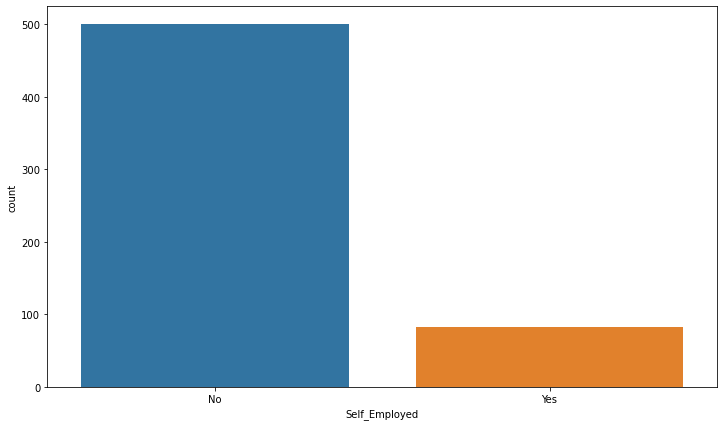



####################################################################################################


In [319]:
i=4
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

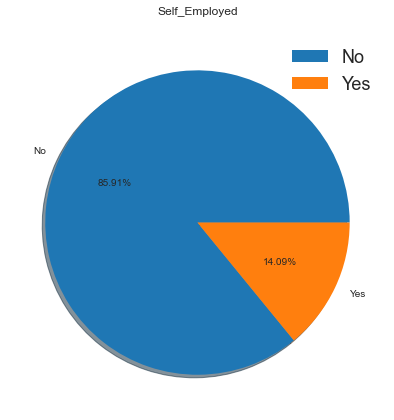

In [349]:
plt.figure(figsize=(12,7))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self_Employed\n')
plt.legend(prop={'size':18})
plt.show()

we see from the above count plot and pie plot that most of the applicant of loan is not Self_Employed

column Name: Loan_Amount_Term


360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


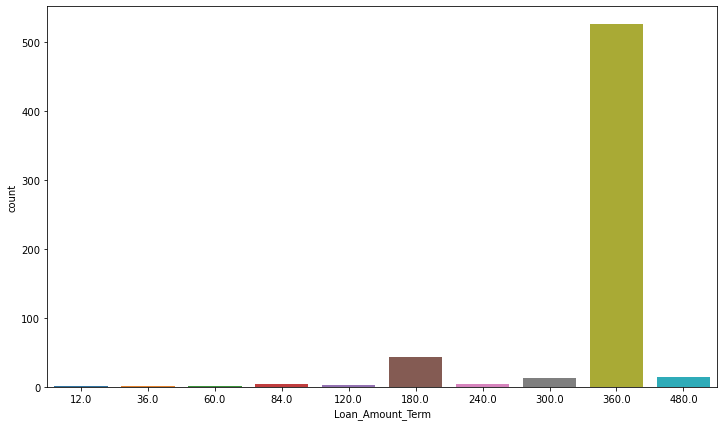



####################################################################################################


In [193]:
i=8
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

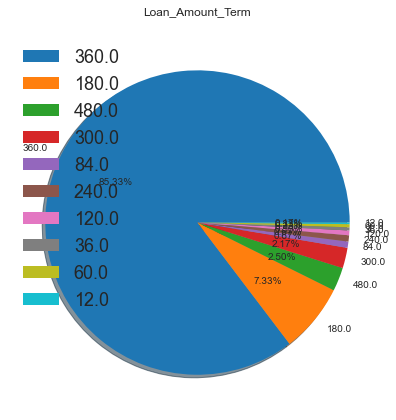

In [350]:
plt.figure(figsize=(12,7))
plt.pie(df['Loan_Amount_Term'].value_counts(), labels=df['Loan_Amount_Term'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan_Amount_Term\n')
plt.legend(prop={'size':18})
plt.show()

we see from the above plot there are 10 types of Loan_Amount_Term and most of the applicant Loan_Amount_Term is 360 and very less applicant Loan_Amount_Term is 12.0 or 36.0 or 60.0

column Name: Credit_History


1.0    475
0.0     89
Name: Credit_History, dtype: int64


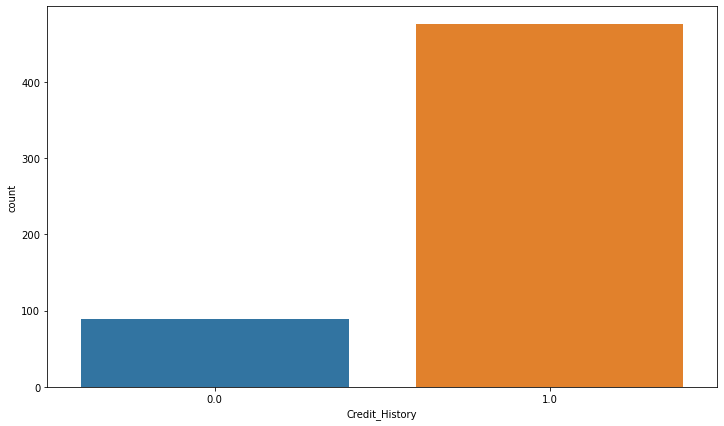



####################################################################################################


In [320]:
i=9
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

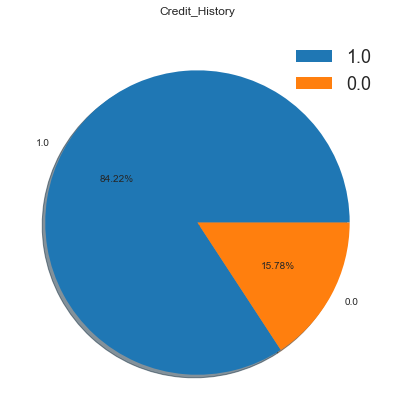

In [351]:
plt.figure(figsize=(12,7))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Credit_History\n')
plt.legend(prop={'size':18})
plt.show()

approximately 84% appilcant credit history is good

column Name: Property_Area


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


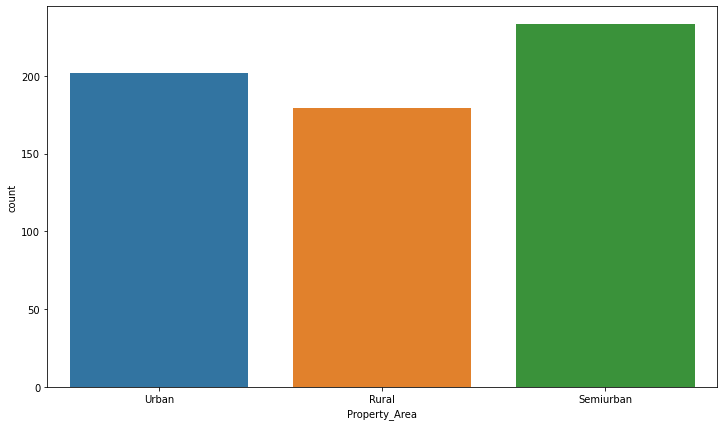



####################################################################################################


In [195]:
i=10
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

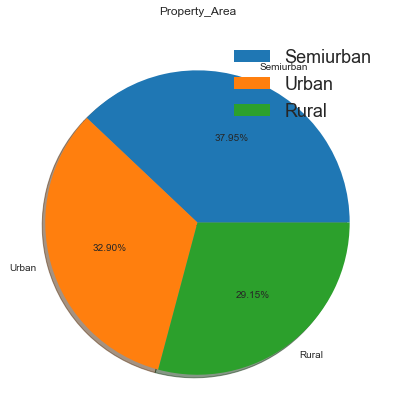

In [352]:
plt.figure(figsize=(12,7))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property_Area\n')
plt.legend(prop={'size':18})
plt.show()

column Name: Loan_Status


Y    422
N    192
Name: Loan_Status, dtype: int64


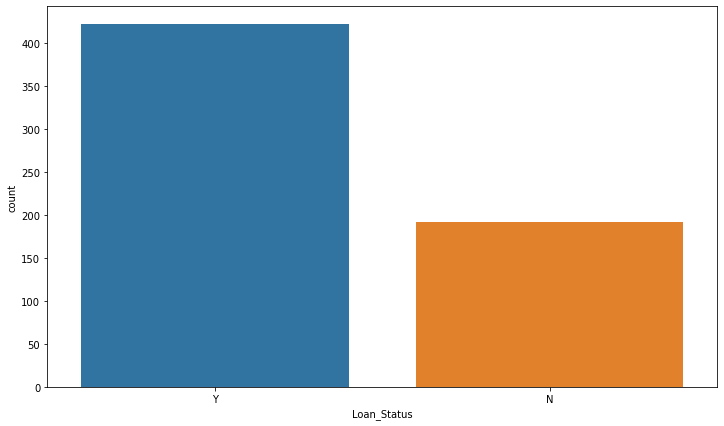



####################################################################################################


In [321]:
i=11
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

we see from the above plot that the number of loan approved applicant is higher than the number of non approved loan applicant.

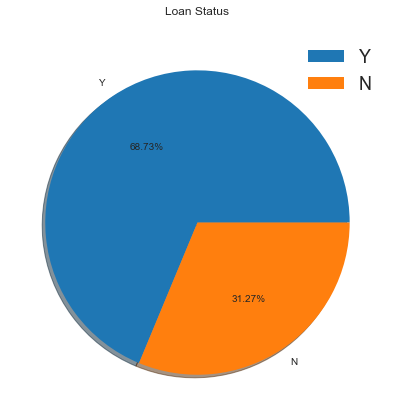

In [344]:
plt.figure(figsize=(12,7))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status\n')
plt.legend(prop={'size':18})
plt.show()

We can clearly see from the pie plot that 68.73% of the applicants were approved for the loan and 31.27% of the applicants were not approved for the loan.

In [322]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [323]:
index_n

[5, 6, 7, 8, 9]

column Name: ApplicantIncome


2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
len= 505


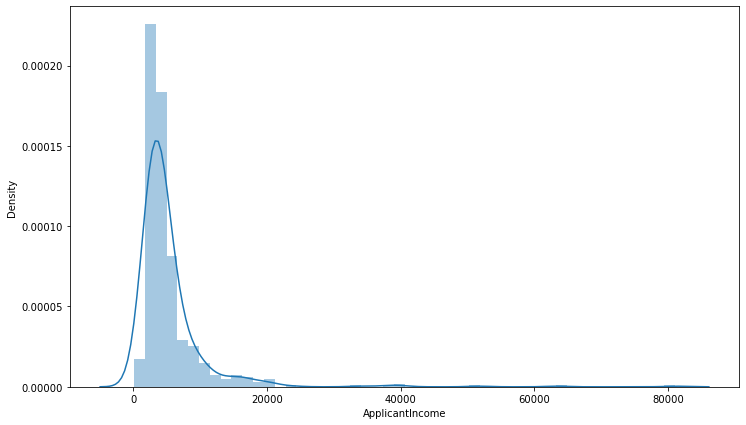



####################################################################################################


In [324]:
i=5 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

since,the tails of the curve present in right side,so we must tail that th data of ApplicantIncome column is positively skewed.we control this skewness later on.
most of the applicant income is between 1000 to 6000.
few applicant's income greater than 20000.

column Name: CoapplicantIncome


0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
len= 287


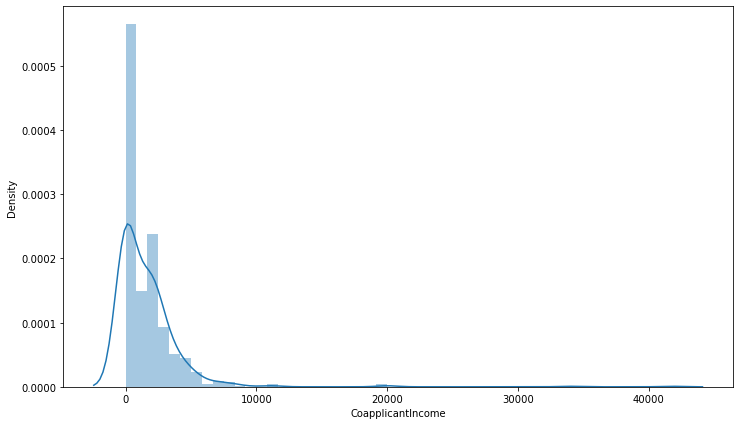



####################################################################################################


In [327]:
i=6 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

since,the tails of the curve present in right side,so we must tail that the data of CoapplicantIncome column is positively skewed.we control this skewness later on.
most of the Coapplicant income is between 0 to 3000.
few applicant's income greater than 20000.

column Name: LoanAmount


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64
len= 203


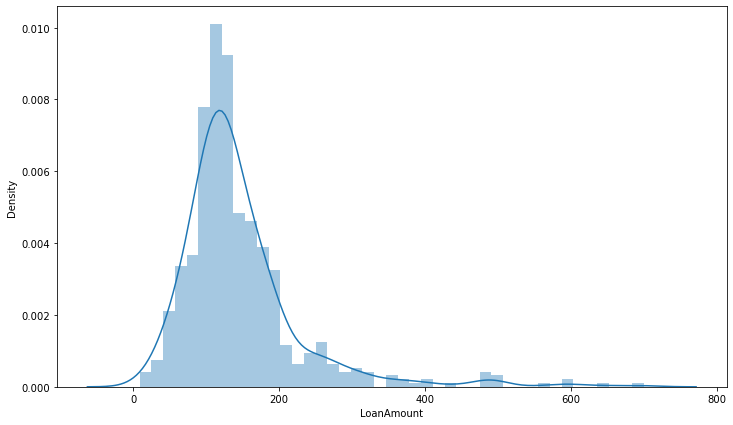



####################################################################################################


In [326]:
i=7 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

above distrbution plot is positively skewed 

column Name: Loan_Amount_Term


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
len= 10


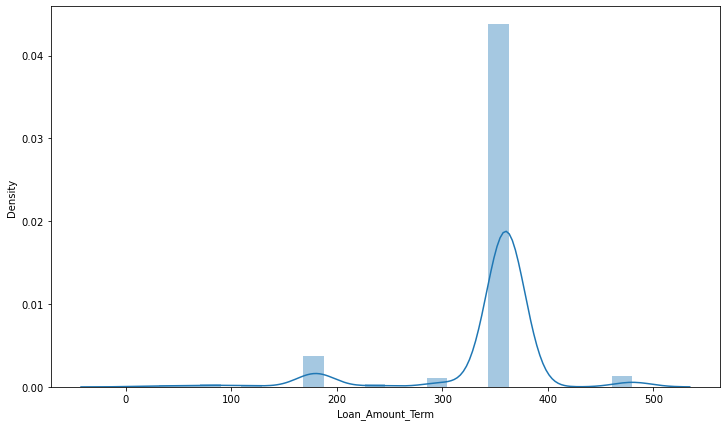



####################################################################################################


In [328]:
i=8 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

the aboove plot looks like normal distribution curve

column Name: Credit_History


1.0    475
0.0     89
Name: Credit_History, dtype: int64
len= 2


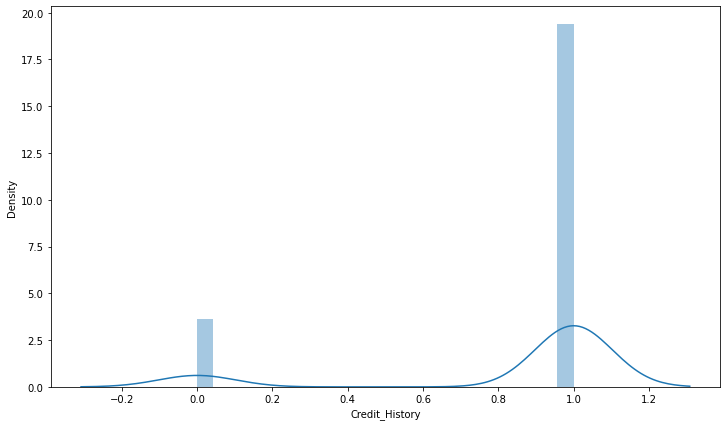



####################################################################################################


In [329]:
i=9 #using the index no of numerical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.distplot(df[df.columns[i]])
plt.show()
print('\n')
print("#"*100)

the aboove plot looks like normal distribution curve

# Bivariate Analysis:

# Loan_Status Vs Gender

Loan_Status Vs Gender




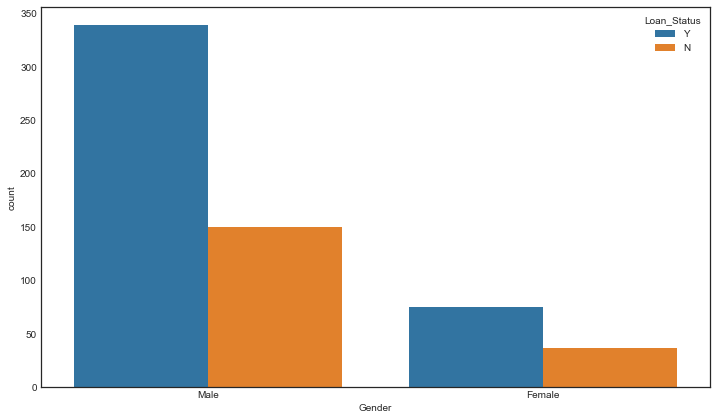

####################################################################################################


In [353]:
i=0
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

# Loan_Status Vs Married

Loan_Status Vs Married




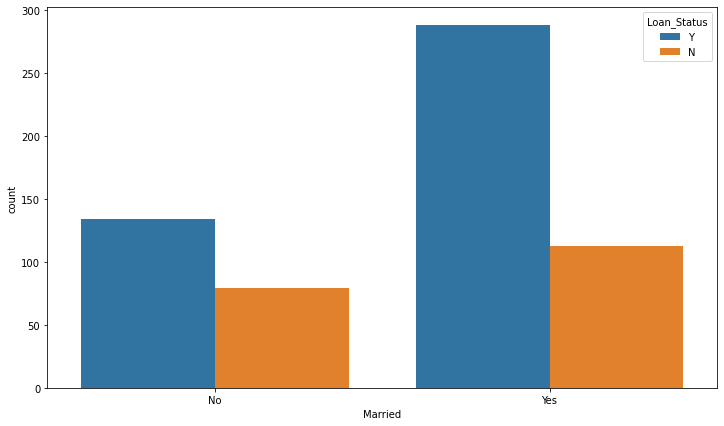

####################################################################################################


In [198]:
i=1
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

Most married applicants are accepted for loans compared to unmarried applicants

Loan_Status Vs Education




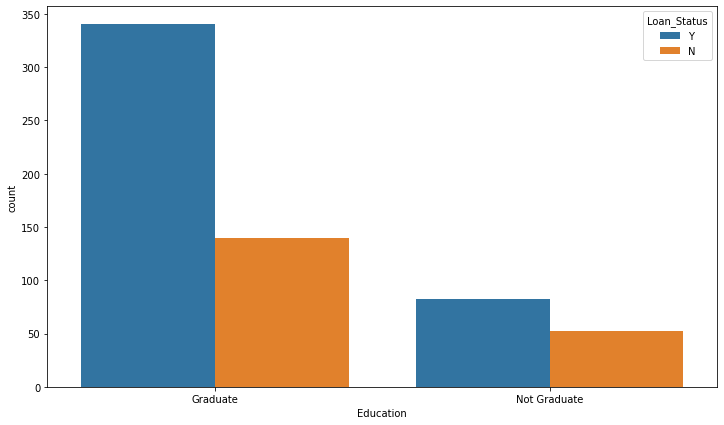

####################################################################################################


In [200]:
i=3
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

If you are a graduate, a loan is more likely to be approved than a not graduate applicant.

Loan_Status Vs Self_Employed




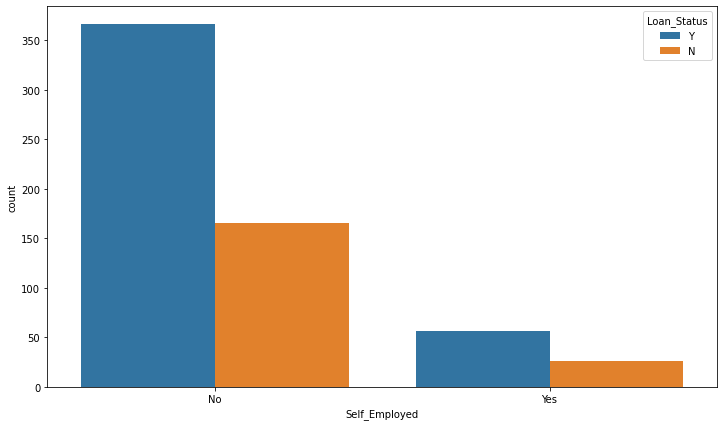

####################################################################################################


In [201]:
i=4
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

If you are Self_Employed, a loan is more likely to be approved than a not Self_Employed applicant.

Loan_Status Vs Loan_Amount_Term




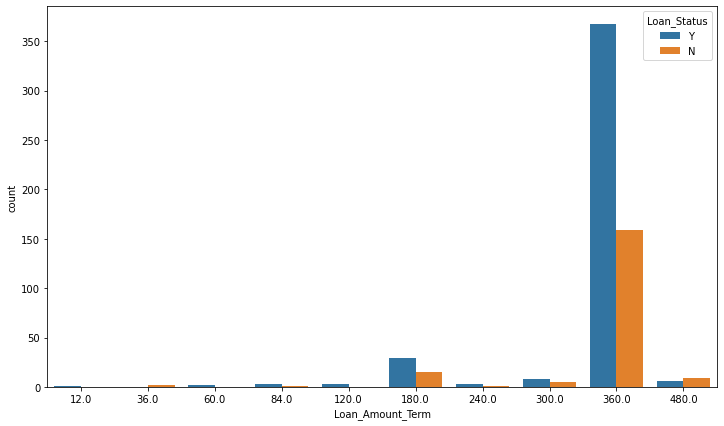

####################################################################################################


In [202]:
i=8
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

Loan_Status Vs Credit_History




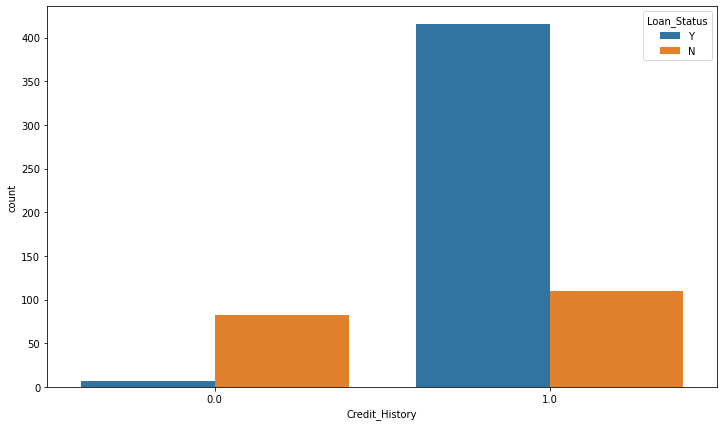

####################################################################################################


In [203]:
i=9
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

If you have a good credit history then the chance of getting a loan is high

Loan_Status Vs Property_Area




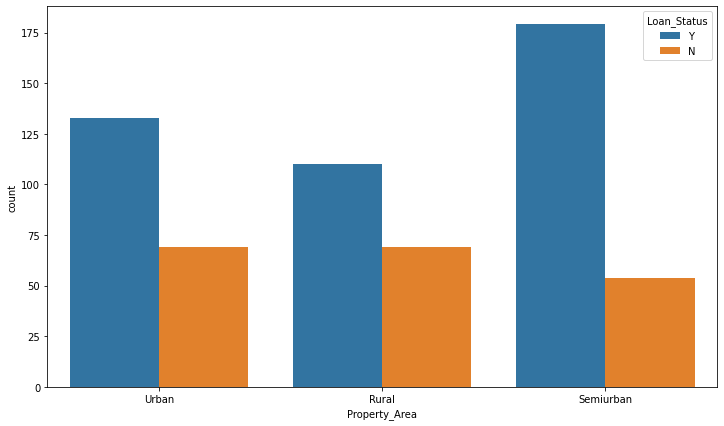

####################################################################################################


In [204]:
i=10
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]],hue=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

If your property area is semi urban type then the chance of getting a loan is high

In [360]:
index_n

[5, 6, 7, 8, 9]

Loan_Status Vs ApplicantIncome




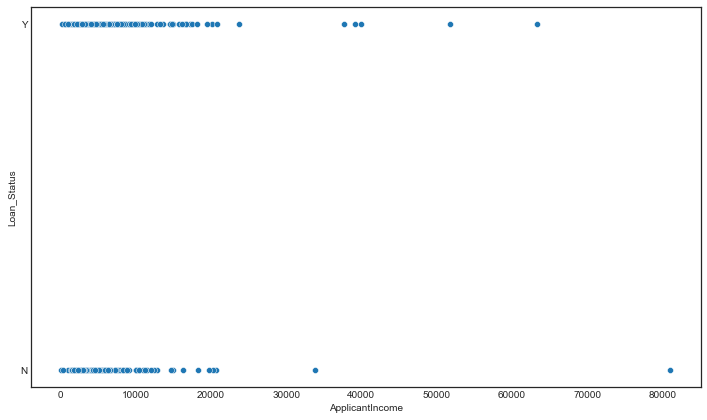

####################################################################################################


In [363]:
i=5
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.scatterplot(df[df.columns[i]],y=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

The data is equaly distributed in 0 to 20000.the above plot shows the outliers of the column

Loan_Status Vs CoapplicantIncome




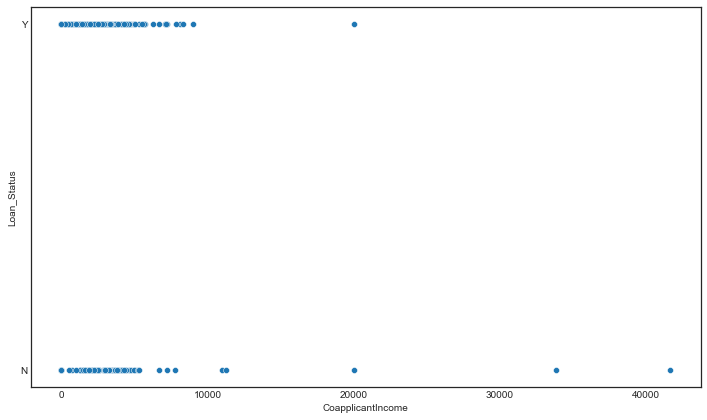

####################################################################################################


In [366]:
i=6
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.scatterplot(df[df.columns[i]],y=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

the data is equally distributed in 0 to 10000 and outliers present

Loan_Status Vs LoanAmount




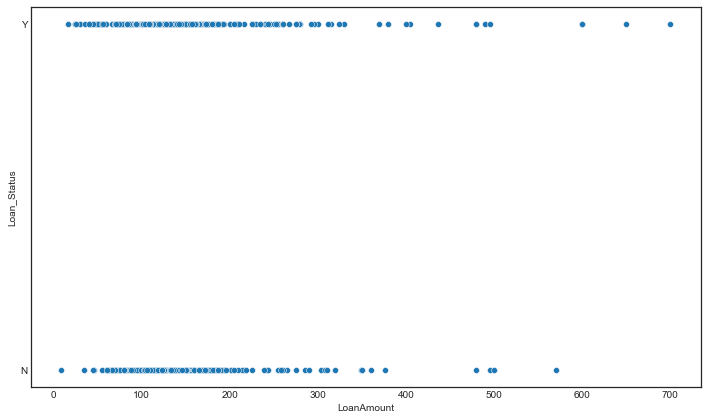

####################################################################################################


In [367]:
i=7
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.scatterplot(df[df.columns[i]],y=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

the data is equally distributed in 50 to 350 and some outliers present

Loan_Status Vs Loan_Amount_Term




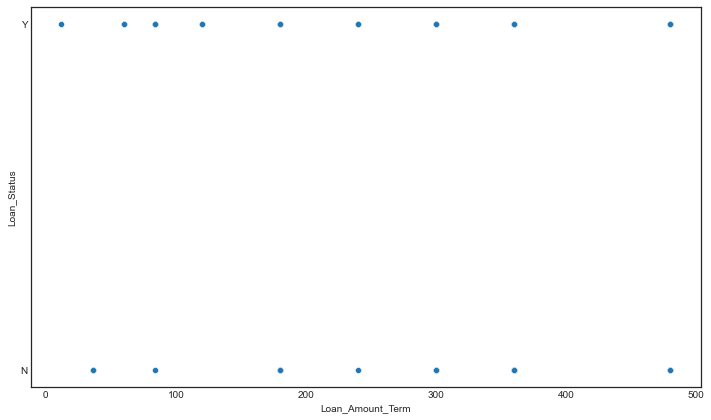

####################################################################################################


In [368]:
i=8
print("Loan_Status Vs",df.columns[i])
plt.figure(figsize=(12,7))
sns.scatterplot(df[df.columns[i]],y=df['Loan_Status'])
print('\n')
plt.show()
print("#"*100)

# Multivariate Analysis:

<Figure size 1080x504 with 0 Axes>

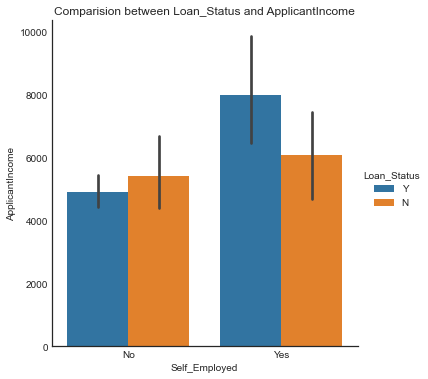

In [375]:
#checking relation between Self_Employed and ApplicantIncome
plt.figure(figsize=(15,7))
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

if applicant is self employed and invome is everage then chance of geting the loan is high

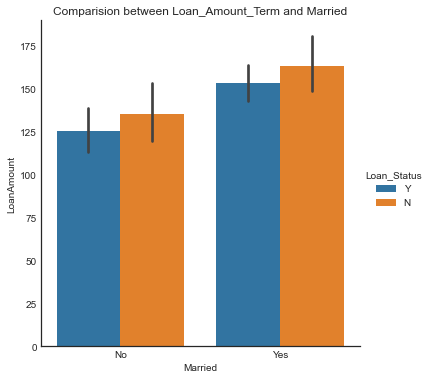

In [376]:
#checking relation between LoanAmount and Married on the basis of target
sns.catplot(x='Married',y="LoanAmount",data=df,kind='bar',hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

from the above plot we say that if a applicant is married and loan amount is average then chance of geting loan is high.

<Figure size 1080x504 with 0 Axes>

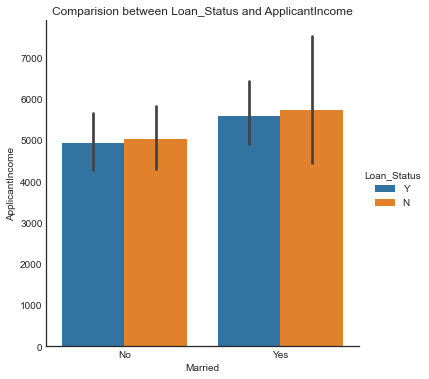

In [379]:
#checking relation between Self_Employed and ApplicantIncome
plt.figure(figsize=(15,7))
sns.catplot(x='Married',y='ApplicantIncome',data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()

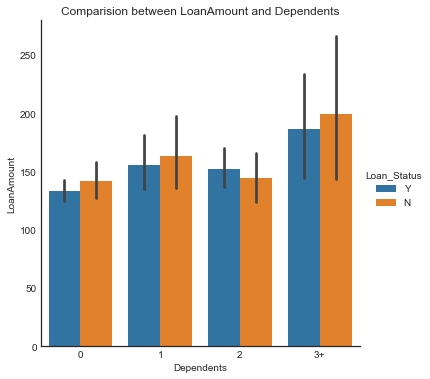

In [380]:
#checking relation between Loan_Amount and Dependents on the basis of target
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between LoanAmount and Dependents")
plt.show()

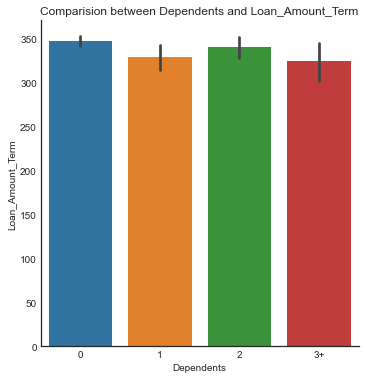

In [381]:
#checking relation between Loan_Amount_Term and Dependents
sns.catplot(x='Dependents',y="Loan_Amount_Term",data=df,kind='bar')
plt.title("Comparision between Dependents and Loan_Amount_Term")
plt.show()

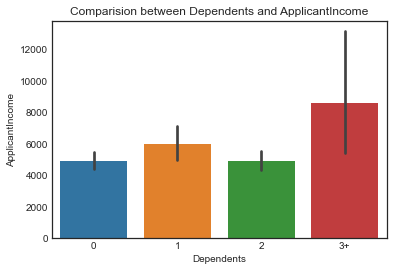

In [382]:
#let's check the applicant income as per Dependents
sns.barplot(x='Dependents',y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

The applicants dependents more than 3 has high average income and dependents with 2 has less income

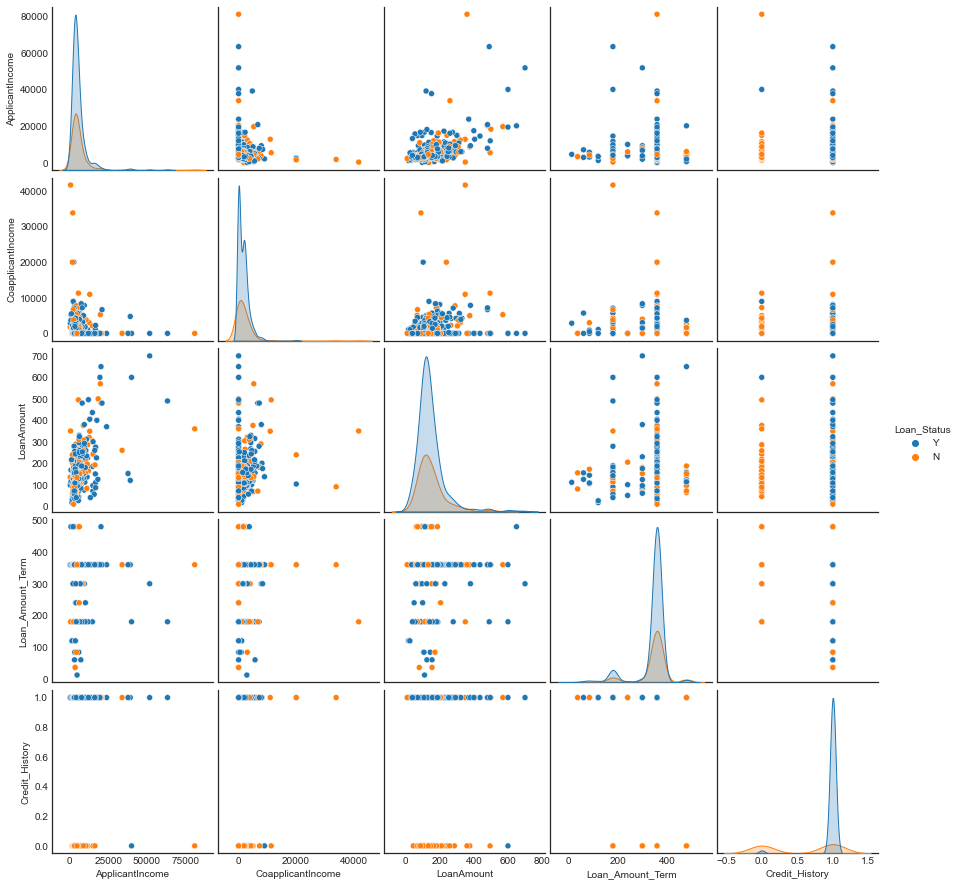

In [372]:
sns.pairplot(df,hue="Loan_Status")

We can observe the linear relationship between ApplicatIncome and LoanAmount, CoapplicantIncome and LoanAmount, ApplicantIncome and TotalIncome.
We can also observe the correlation in some columns also there are outliers present in some of the columns.

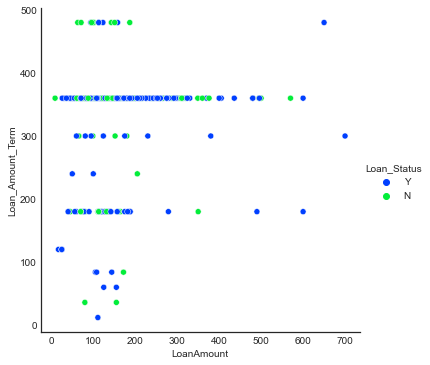

In [383]:
plt.style.use('seaborn-bright')
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')

if the loan applicant's Loan amount range and loan amount term range is between 200 and 300n,300 and 400 respectively then chance of geting loan is very high.

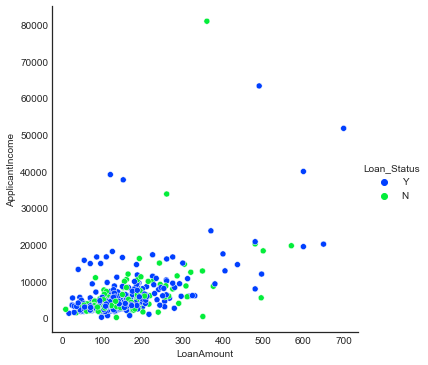

In [387]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')

from the above plot we are not geting any clue of chance of geting loan is high.

In [205]:
#Checking Skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

we see that skewness is present in numerical_columns of the dataframe.we will handle it later on.

# DistriBution Curve:

In [208]:
#hecking Correlation
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


<AxesSubplot:>

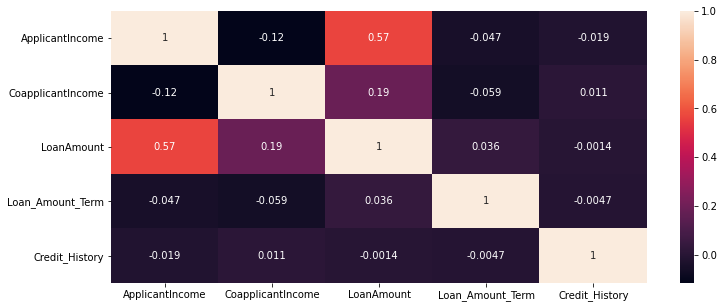

In [209]:
#checking corrleation using heatmap
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

we see that The other columns do not have a good correlation with the target column

# Checking VIF score:

In [210]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [211]:
p=df[['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']]

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif["features"]=p.columns
    print(vif)

In [213]:
#checking VIF score
vif_clac()

   VIF Factor           features
0    2.847862    ApplicantIncome
1    1.460972  CoapplicantIncome
2    6.530335         LoanAmount
3    7.765666   Loan_Amount_Term
4    5.813353     Credit_History


we see that VIF score of "Loan_Amount_Term" column is maximum.so,we drop this column from the DataFrame.

In [214]:
#droping "Loan_Amount_Term"
df=df.drop("Loan_Amount_Term",axis=1)

In [215]:
#checking Dataframe
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,1.0,Urban,Y


# LabelEncoding:

our Dataframe has many non Numeric column.Now we convert this non Numeric column into numeric column by LabelEncoding.

In [216]:
df.nunique().to_frame('unique values')

,unique values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Credit_History,2
Property_Area,3


In [218]:
list=["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]

In [219]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i]).astype(float)

In [220]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,1.0,2.0,1.0


# Checking Outliers By Boxplot:

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    float64
 10  Loan_Status        614 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 52.9 KB


<AxesSubplot:xlabel='ApplicantIncome'>

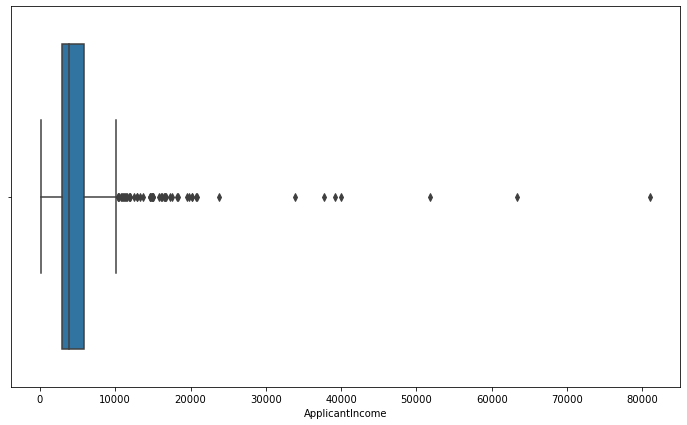

In [222]:
#Boxplot of "ApplicantIncome" column
plt.figure(figsize=(12,7))
sns.boxplot(df['ApplicantIncome'])

we see that there are many outliers exist in "ApplicantIncome" column

<AxesSubplot:xlabel='CoapplicantIncome'>

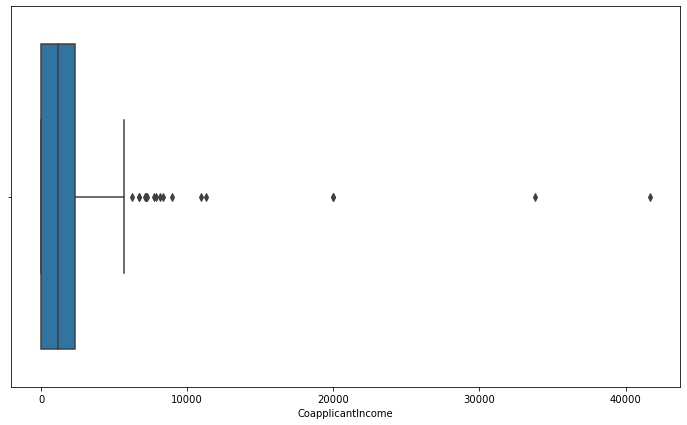

In [223]:
#Boxplot of "CoapplicantIncome" column
plt.figure(figsize=(12,7))
sns.boxplot(df['CoapplicantIncome'])

we see that there are many outliers exist in "CoapplicantIncome" column

<AxesSubplot:xlabel='LoanAmount'>

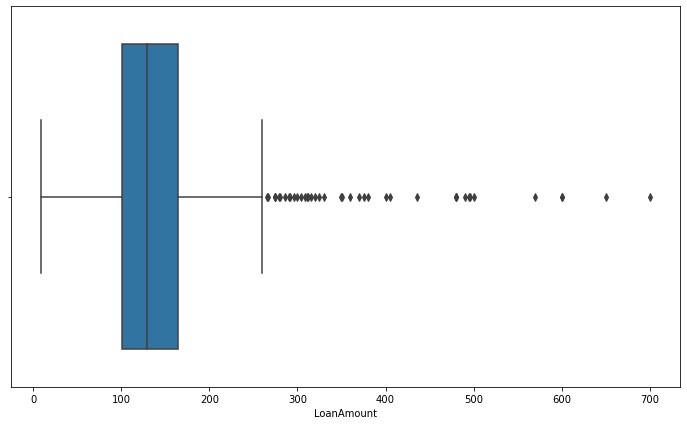

In [224]:
#Boxplot of "LoanAmount" column
plt.figure(figsize=(12,7))
sns.boxplot(df['LoanAmount'])

we see that there are many outliers exist in "LoanAmount" column

# Remove The Outliers From The DataFrame By Zscore

In [226]:
#import zscore
from scipy.stats import zscore

In [227]:
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [229]:
threshold=3
print(np.where(z>3))

(array([  9, 126, 130, 155, 155, 171, 171, 177, 177, 183, 185, 278, 308,
       333, 333, 369, 402, 409, 417, 432, 443, 487, 506, 523, 525, 561,
       581, 600, 604], dtype=int64), array([6, 5, 7, 5, 7, 5, 7, 6, 7, 5, 5, 7, 7, 5, 7, 7, 6, 5, 6, 7, 5, 7,
       7, 7, 7, 7, 6, 6, 7], dtype=int64))


In [230]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,1.0,2.0,1.0


In [231]:
print(df.shape)
print(df_new.shape)

(614, 11)
(589, 11)


# Checking percentage of dataloss:

In [233]:
percentage_of_dataloss=((614-589)/614)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 4.071661237785016


# Dividing data in features and vectors:

In [236]:
x=df_new.iloc[:,0:10] #Independent variable
y=df_new.iloc[:,-1] #Dependent variable

In [237]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.000000,1.0,2.0


In [238]:
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 589, dtype: float64

# Oversampling:

In [242]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [243]:
x,y=smt.fit_resample(x,y)

In [244]:
x.value_counts()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Credit_History  Property_Area
0.0     0.0      0.0         0.000000   0.0            645              3683.0             113.000000  1.000000        0.0              1
1.0     1.0      0.0         1.000000   0.0            3572             4114.0             152.000000  0.000000        0.0              1
                                                       2600             1911.0             116.000000  0.000000        1.0              1
                                                       2875             1750.0             105.000000  1.000000        1.0              1
                                                       2894             2792.0             155.000000  1.000000        0.0              1
                                                                                                                                       ..
        0.0      0.0         0.272724  

In [245]:
y.value_counts()

0.0    407
1.0    407
Name: Loan_Status, dtype: int64

we see that class of target column has been balanced.

# Transforming data to remove skewness:

In [246]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.52108936, -1.34792948, -0.87559205, ...,  0.33040459,
         0.59816718,  1.22972013],
       [ 0.52108936,  0.80855643,  0.86052817, ..., -0.01543924,
         0.59816718, -1.37438019],
       [ 0.52108936,  0.80855643, -0.87559205, ..., -1.48793172,
         0.59816718,  1.22972013],
       ...,
       [-1.60426978, -0.3462814 ,  0.97117125, ..., -0.44849969,
        -1.24404707, -0.75873535],
       [ 0.52108936, -0.34285888,  0.97311658, ..., -1.88613639,
        -1.5238764 ,  0.21522535],
       [ 0.52108936, -0.44246784,  1.20747905, ..., -0.02613563,
        -1.45895   , -0.60253529]])

In [247]:
#print skewness after power transform
df_new1=pd.DataFrame(x)
df_new1.skew()

0   -1.450561
1   -0.505858
2    0.390268
3    0.988343
4    1.838871
5    0.005996
6   -0.148873
7    0.063426
8   -1.136497
9   -0.151067
dtype: float64

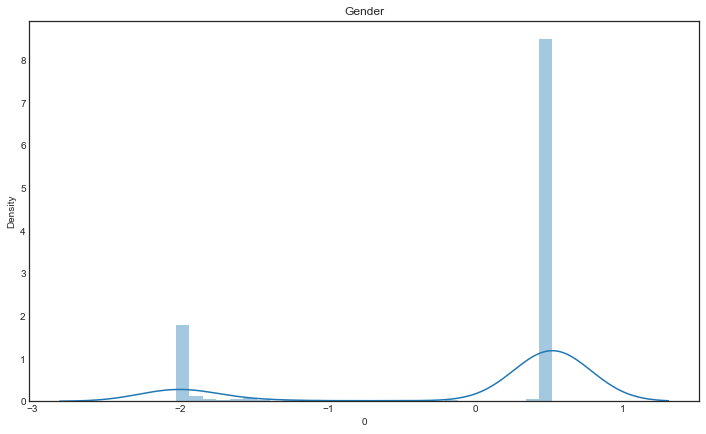

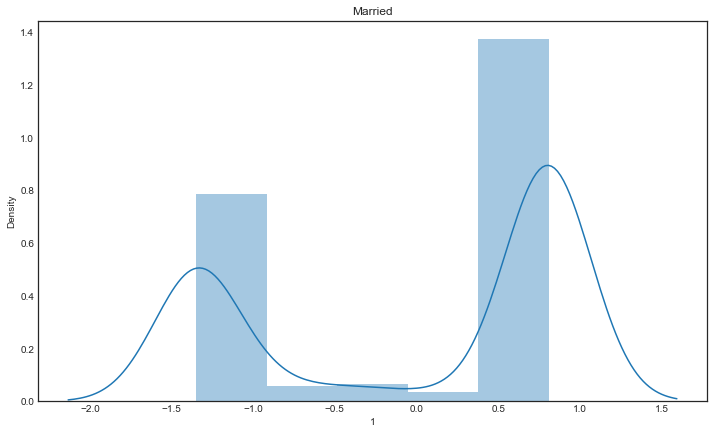

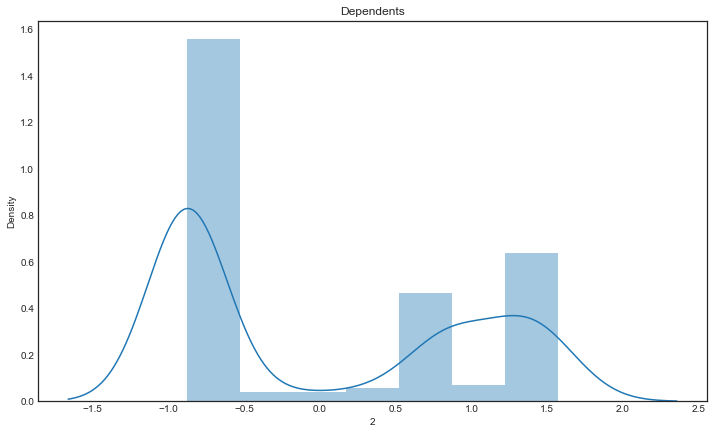

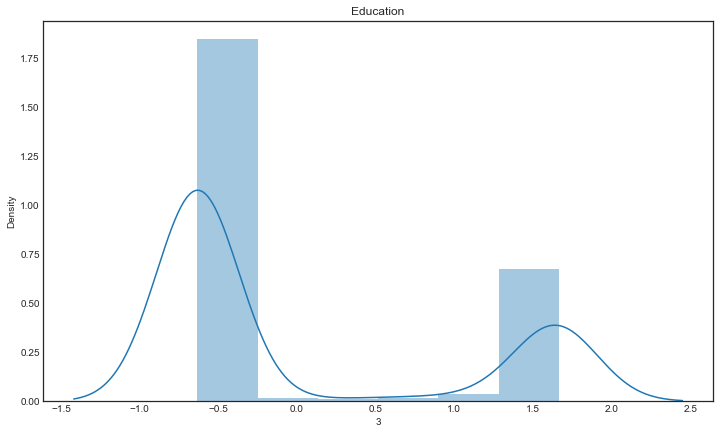

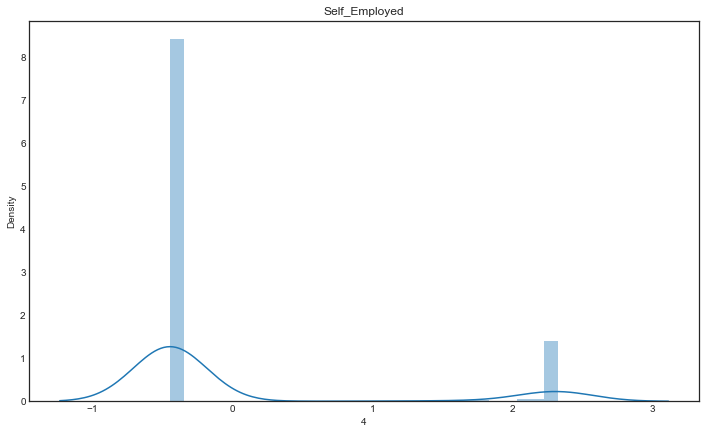

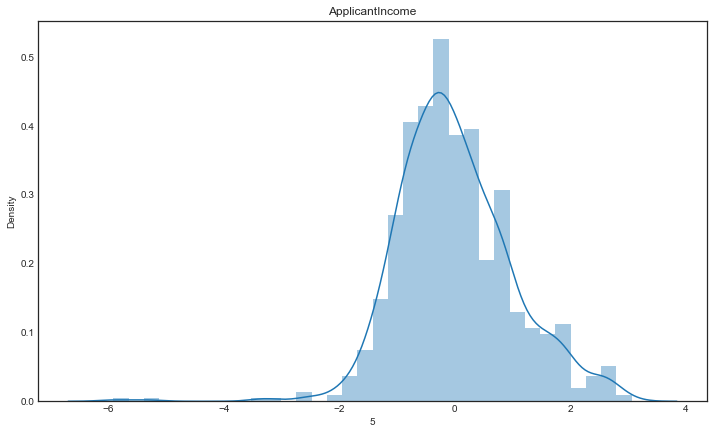

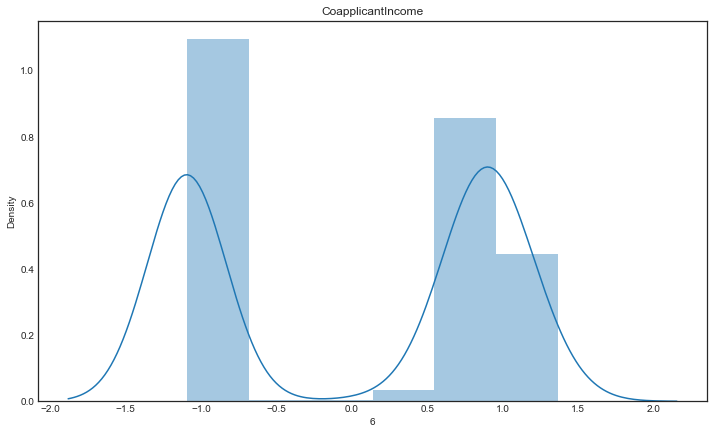

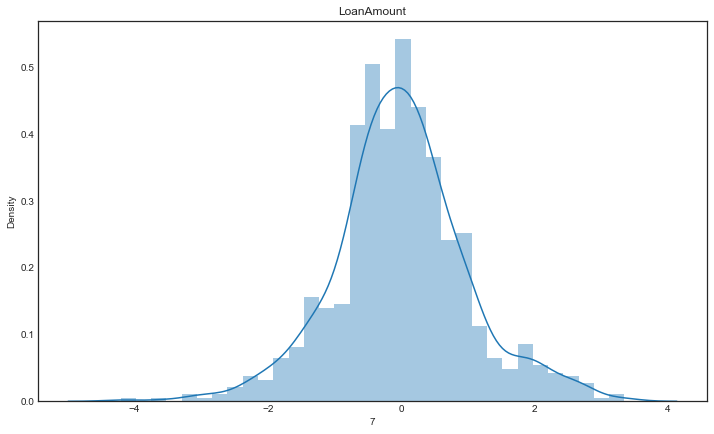

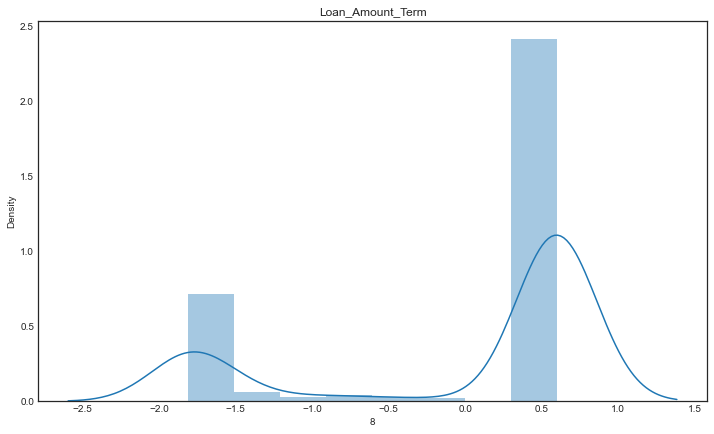

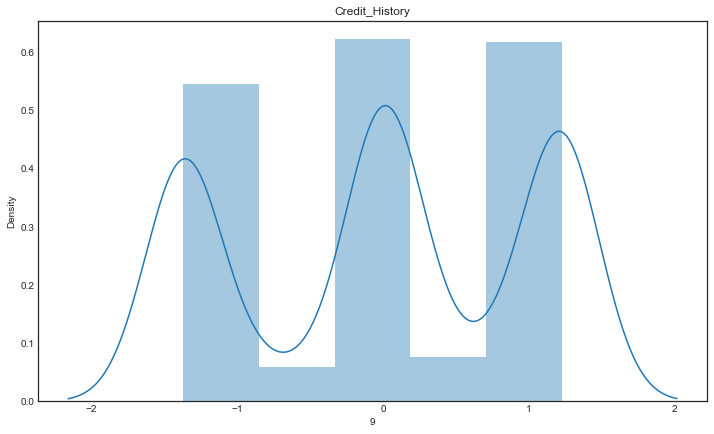

In [359]:
for i in range(10):
    plt.figure(figsize=(12,7))
    sns.distplot(df_new1[df_new1.columns[i]])
    plt.title(df.columns[i])
    plt.show()

skewness removed from the each column

In [250]:
print(df_new.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')


Now our Data is Ready for Model Building

# Model Building:

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [252]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.8204081632653061 on random state   112


we found best random state values is 112 .Now we will creat our train_test_split using this random state

In [254]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=112)

In [257]:
x_train

array([[-2.00414424, -1.34792948, -0.87559205, ..., -0.77407144,
         0.59816718, -1.16187009],
       [ 0.52108936,  0.80855643, -0.87559205, ...,  0.6023944 ,
         0.59816718,  0.01365263],
       [-2.02890602, -1.34792948, -0.87559205, ...,  2.00636492,
         0.59816718,  1.22972013],
       ...,
       [ 0.52108936, -1.34792948, -0.87559205, ..., -0.38521333,
         0.59816718, -1.37438019],
       [ 0.52108936,  0.80855643,  1.34966014, ..., -0.17546734,
         0.59816718, -1.37438019],
       [ 0.52108936,  0.47746606, -0.51247234, ...,  0.11104143,
         0.59816718,  0.97772783]])

In [258]:
x_test

array([[ 0.52108936,  0.80855643,  1.34966014, ...,  1.31980965,
         0.59816718,  0.01365263],
       [ 0.52108936,  0.80855643, -0.87559205, ...,  0.37677833,
        -1.81056699, -1.37438019],
       [ 0.52108936,  0.80855643,  1.34966014, ...,  1.00617362,
         0.59816718,  1.22972013],
       ...,
       [ 0.52108936, -0.38841571,  1.23729277, ...,  0.02681121,
        -1.28487319, -0.5693338 ],
       [ 0.52108936,  0.80855643,  1.34966014, ...,  0.28671297,
         0.59816718, -1.37438019],
       [ 0.52108936,  0.80855643, -0.87559205, ...,  1.95577675,
         0.59816718,  0.01365263]])

In [259]:
y_train

626    0.0
537    1.0
118    1.0
146    1.0
374    1.0
      ... 
197    1.0
321    1.0
474    1.0
232    1.0
612    0.0
Name: Loan_Status, Length: 569, dtype: float64

In [260]:
y_test

484    1.0
435    0.0
141    1.0
166    1.0
635    0.0
      ... 
395    0.0
508    1.0
662    0.0
303    1.0
155    1.0
Name: Loan_Status, Length: 245, dtype: float64

In [261]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (569, 10)
x_test shape = (245, 10)
y_train shape = (569,)
y_test shape = (245,)


In [263]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [264]:
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [266]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.8204081632653061
[[ 83  33]
 [ 11 118]]
              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79       116
         1.0       0.78      0.91      0.84       129

    accuracy                           0.82       245
   macro avg       0.83      0.82      0.82       245
weighted avg       0.83      0.82      0.82       245

####################################################################################################
Accuracy score of  GaussianNB() is
0.8
[[ 70  46]
 [  3 126]]
              precision    recall  f1-score   support

         0.0       0.96      0.60      0.74       116
         1.0       0.73      0.98      0.84       129

    accuracy                           0.80       245
   macro avg       0.85      0.79      0.79       245
weighted avg       0.84      0.80      0.79       245

##################################################################################################

# Checking Cross Val Score:

In [275]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.7432432432432432
cross validation score of GaussianNB() is = 0.7506142506142506
cross validation score of SVC() is = 0.7555282555282555
cross validation score of DecisionTreeClassifier() is = 0.7727272727272727
cross validation score of KNeighborsClassifier() is = 0.7530712530712531
cross validation score of RandomForestClassifier() is = 0.8009828009828011
cross validation score of GradientBoostingClassifier() is = 0.7788697788697789
cross validation score of AdaBoostClassifier() is = 0.7199017199017199
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.7432891975978583
cross validation score of GaussianNB() is = 0.7494347369944286
cross validation score of SVC() is = 0.75557123218291
cross validation score of DecisionTreeClassifier() is = 0.7802166992258158
cross validation score of KNeighborsClassifier() is

we get best best cross vall score from RandomForestClassifier for CV=9

# Parameter Tuning for RandomForestClassifier:

In [293]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=9,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [277]:
gcv1.best_estimator_

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [278]:
final_model=RandomForestClassifier(max_depth=4, max_features='sqrt')

In [280]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

Test Accuracy score of final model = 0.8653061224489796
Train Accuracy score of final model = 0.8453427065026362
[[ 96  20]
 [  9 120]]
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87       116
         1.0       0.86      0.93      0.89       129

    accuracy                           0.88       245
   macro avg       0.89      0.88      0.88       245
weighted avg       0.88      0.88      0.88       245



# ROCAUC curve

In [281]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.7202354 , 0.02311913, 0.68305039, 0.64299328, 0.00620227,
       0.5960231 , 0.73171293, 0.75475017, 0.69097738, 0.74512082,
       0.75528402, 0.87979657, 0.44497481, 0.69570761, 0.76630638,
       0.5322876 , 0.02622228, 0.49057741, 0.03158547, 0.5198939 ,
       0.45865305, 0.0097514 , 0.63157654, 0.69541575, 0.51195609,
       0.71429255, 0.01448433, 0.00989069, 0.70331843, 0.01124918,
       0.39190464, 0.65039558, 0.80394683, 0.56819014, 0.03948078,
       0.68049227, 0.4994501 , 0.58651666, 0.61471792, 0.03158388,
       0.64909839, 0.01889293, 0.71345857, 0.76405285, 0.78502615,
       0.71623044, 0.01200565, 0.65908368, 0.01125235, 0.0142646 ,
       0.74659381, 0.02660472, 0.714691  , 0.64982422, 0.00958988,
       0.74029038, 0.07496406, 0.53722883, 0.74278335, 0.6857447 ,
       0.64446105, 0.72087653, 0.8203579 , 0.70213194, 0.69960935,
       0.70005693, 0.02458604, 0.60296788, 0.67368656, 0.04330537,
       0.75314573, 0.67301532, 0.65839021, 0.0151591 , 0.48577

In [282]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [283]:
fpr

array([0.        , 0.        , 0.        , 0.00862069, 0.00862069,
       0.01724138, 0.01724138, 0.03448276, 0.03448276, 0.04310345,
       0.04310345, 0.05172414, 0.05172414, 0.06034483, 0.06034483,
       0.06896552, 0.06896552, 0.07758621, 0.07758621, 0.0862069 ,
       0.0862069 , 0.09482759, 0.09482759, 0.11206897, 0.11206897,
       0.12068966, 0.12068966, 0.12931034, 0.12931034, 0.13793103,
       0.13793103, 0.14655172, 0.14655172, 0.15517241, 0.15517241,
       0.18103448, 0.18103448, 0.18965517, 0.18965517, 0.19827586,
       0.19827586, 0.20689655, 0.20689655, 0.21551724, 0.21551724,
       0.22413793, 0.22413793, 0.23275862, 0.23275862, 0.24137931,
       0.24137931, 0.25      , 0.25      , 0.25862069, 0.25862069,
       0.26724138, 0.26724138, 0.27586207, 0.27586207, 0.28448276,
       0.28448276, 0.29310345, 0.29310345, 0.3362069 , 0.3362069 ,
       0.34482759, 0.34482759, 0.35344828, 0.35344828, 0.40517241,
       0.40517241, 0.75862069, 0.75862069, 0.86206897, 0.86206

In [284]:
tpr

array([0.        , 0.00775194, 0.01550388, 0.01550388, 0.03100775,
       0.03100775, 0.03875969, 0.03875969, 0.10852713, 0.10852713,
       0.13953488, 0.13953488, 0.17829457, 0.17829457, 0.24031008,
       0.24031008, 0.27131783, 0.27131783, 0.34883721, 0.34883721,
       0.35658915, 0.35658915, 0.3875969 , 0.3875969 , 0.40310078,
       0.40310078, 0.44186047, 0.44186047, 0.46511628, 0.46511628,
       0.50387597, 0.50387597, 0.53488372, 0.53488372, 0.58914729,
       0.58914729, 0.59689922, 0.59689922, 0.63565891, 0.63565891,
       0.68217054, 0.68217054, 0.72868217, 0.72868217, 0.73643411,
       0.73643411, 0.75968992, 0.75968992, 0.78294574, 0.78294574,
       0.81395349, 0.81395349, 0.8372093 , 0.8372093 , 0.85271318,
       0.85271318, 0.89147287, 0.89147287, 0.89922481, 0.89922481,
       0.91472868, 0.91472868, 0.92248062, 0.92248062, 0.94573643,
       0.94573643, 0.96124031, 0.96124031, 0.96899225, 0.96899225,
       0.97674419, 0.97674419, 0.98449612, 0.98449612, 0.99224

In [286]:
thresholds

array([1.87979657, 0.87979657, 0.85718457, 0.84603166, 0.83494191,
       0.83201033, 0.8203579 , 0.81616965, 0.78502615, 0.78271313,
       0.77075196, 0.76948684, 0.76152446, 0.76139766, 0.74714212,
       0.74659381, 0.74278335, 0.74113889, 0.7202354 , 0.71623044,
       0.71511412, 0.714691  , 0.71300668, 0.70967371, 0.70331843,
       0.70213194, 0.69541575, 0.69469198, 0.69016283, 0.6868512 ,
       0.67586572, 0.6738514 , 0.66329795, 0.65961811, 0.65093895,
       0.64909839, 0.64712873, 0.64679455, 0.64283127, 0.64184229,
       0.62412432, 0.62227442, 0.60690023, 0.60650875, 0.60531291,
       0.60494155, 0.59834792, 0.59748359, 0.59256752, 0.58904218,
       0.57072199, 0.56839716, 0.55919313, 0.55648202, 0.54203638,
       0.54165845, 0.5199323 , 0.5198939 , 0.51195609, 0.50377396,
       0.50101147, 0.4994501 , 0.49429195, 0.47922525, 0.45865305,
       0.44497481, 0.43504531, 0.41785042, 0.41620949, 0.37007896,
       0.34424555, 0.0142646 , 0.01418016, 0.01144074, 0.01129

In [288]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print("roc_auc_score=",auc_score)

roc_auc_score= 0.8590617481956697


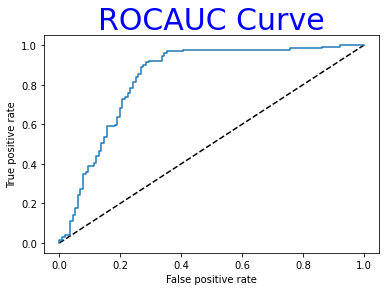

In [289]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROCAUC Curve',color='Blue',size=30)
plt.show()

In [291]:
MLdf=pd.DataFrame([final_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T
MLdf

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
240,0.0,0.0
241,1.0,1.0
242,0.0,0.0
243,1.0,1.0


In [388]:
#Save the final model                                                                      
import joblib                                                                                                     
joblib.dump(final_model,'Loan Application Status Prediction Project Model.pkl')

['Loan Application Status Prediction Project Model.pkl']
